# Tarea M36-AD – Jose Alberto Hernandez Moran
 * Definición de un modelo determinístico de un cálculo de costos

# --- Simulación de Montecarlo: Presupuesto Viaje a Canadá (10 días) ---
 - Este análisis predice cuánto dinero podrías gastar realmente en tu viaje, considerando que los precios de vuelos y comidas pueden variar.

In [20]:
# Importacion de las librerias necearias
import matplotlib.pyplot as plt
import numpy as np
import random
%matplotlib inline

In [21]:
# Definimos los costos fijos si todo saliera exactamente como lo planeo.
# Costos estimados en MXN para 1 persona (10 días)
vuelo_base = 12000  #Desde la ciudad de Mexico Con Air Canada
hospedaje_base = 25000     # $2,500 por noche
comidas_base = 8000       # $800 diario
atracciones_base = 5000
transporte_base = 3000
souvenirs_base = 2000

presupuesto = (vuelo_base + hospedaje_base + comidas_base + 
                        atracciones_base + transporte_base + souvenirs_base)

print(f"Presupuesto inicial estimado: ${presupuesto:,} MXN")

Presupuesto inicial estimado: $55,000 MXN


### En un viaje, los costos no son fijos. Hay que aplicar (segun las definiciones dadas):

 * Vuelos: Distribución Normal (pueden subir o bajar un poco según la fecha).

 * Comidas y Souvenirs: Distribución Uniforme (tienes un mínimo y un máximo de gasto).

 * Hospedaje y Atracciones: Distribución Triangular (hay un valor más probable, pero puede subir mucho).

In [22]:
# De aacuerdo a las definiciones de defin
def simular_viaje(iteraciones):
    costos_totales = []
    
    for i in range(iteraciones):
        # Generación de variables aleatorias
        vuelo = np.random.normal(12000, 2000)             # Media 12k, variando +-2k
        hospedaje = np.random.triangular(15000, 18000, 25000) # Min, Med, Max
        comidas = np.random.uniform(8000, 14000)          # Rango entre 8k y 14k
        atracciones = np.random.triangular(4000, 5000, 8000)
        transporte = np.random.uniform(2500, 5000)
        souvenirs = np.random.uniform(1000, 4000)
        
        suma_viaje = vuelo + hospedaje + comidas + atracciones + transporte + souvenirs
        costos_totales.append(suma_viaje)
        
    return costos_totales

# Ejecutamos 5000 iteraciones
resultados_viaje = simular_viaje(5000)

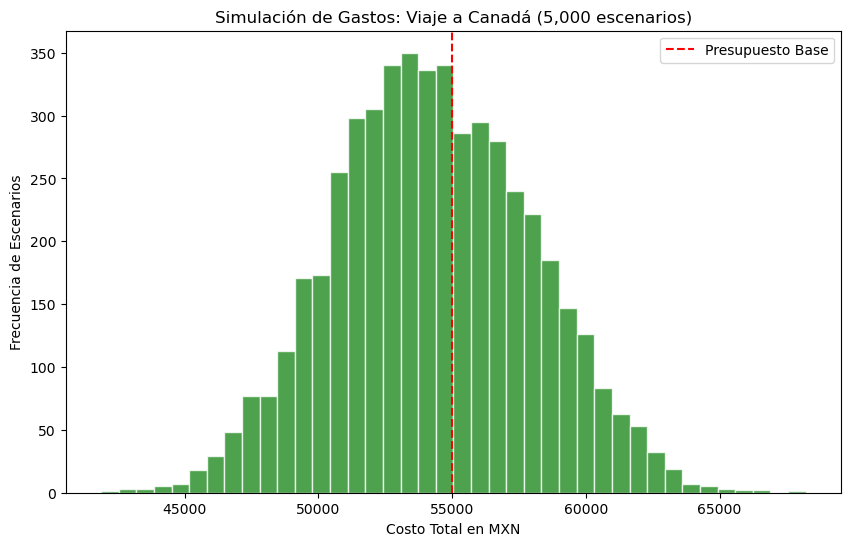

El costo promedio real sería de: $54,295.22 MXN
El escenario más caro registrado fue: $68,217.37 MXN
Existe un 41.5% de probabilidad de gastar más del presupuesto inicial.


In [23]:
plt.figure(figsize=(10, 6))
plt.hist(resultados_viaje, bins=40, color='forestgreen', edgecolor='white', alpha=0.8)
plt.axvline(presupuesto, color='red', linestyle='--', label='Presupuesto Base')
plt.title('Simulación de Gastos: Viaje a Canadá (5,000 escenarios)')
plt.xlabel('Costo Total en MXN')
plt.ylabel('Frecuencia de Escenarios')
plt.legend()
plt.show()

# Análisis de datos
promedio = np.mean(resultados_viaje)
maximo = np.max(resultados_viaje)
prob_exceso = (np.array(resultados_viaje) > presupuesto).mean() * 100

print(f"El costo promedio real sería de: ${promedio:,.2f} MXN")
print(f"El escenario más caro registrado fue: ${maximo:,.2f} MXN")
print(f"Existe un {prob_exceso:.1f}% de probabilidad de gastar más del presupuesto inicial.")

In [28]:
# Saco los percentiles
# Percentiles
for i in range(0, 100, 5):
    print(f'Percentil {i} % = {np.percentile(resultados_viaje , i):,.2f}')

Percentil 0 % = 41,880.97
Percentil 5 % = 48,321.66
Percentil 10 % = 49,627.47
Percentil 15 % = 50,505.69
Percentil 20 % = 51,150.87
Percentil 25 % = 51,707.87
Percentil 30 % = 52,232.97
Percentil 35 % = 52,740.50
Percentil 40 % = 53,210.31
Percentil 45 % = 53,656.38
Percentil 50 % = 54,195.94
Percentil 55 % = 54,664.18
Percentil 60 % = 55,141.42
Percentil 65 % = 55,745.61
Percentil 70 % = 56,290.59
Percentil 75 % = 56,862.60
Percentil 80 % = 57,550.55
Percentil 85 % = 58,241.36
Percentil 90 % = 59,192.96
Percentil 95 % = 60,434.64


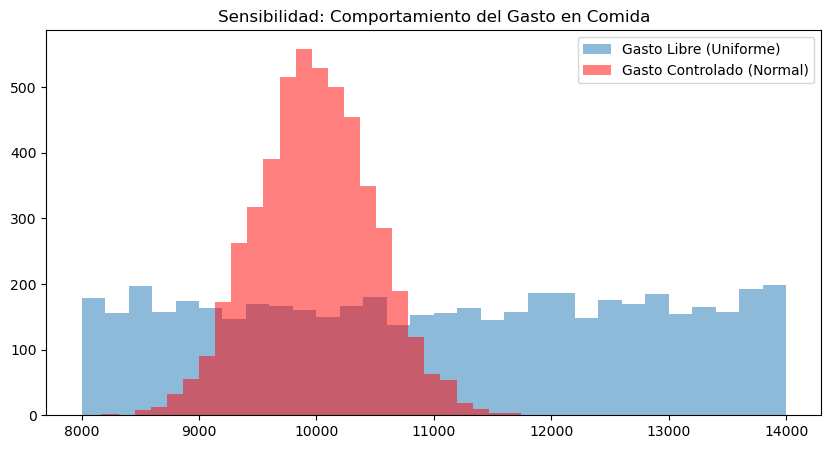

In [13]:
# Comida Escenario A: Uniforme (Gasto libre)
comida_libre = [np.random.uniform(8000, 14000) for i in range(5000)]

# Comida Escenario B: Normal (Gasto controlado/estricto)
comida_estricta = [np.random.normal(10000, 500) for i in range(5000)]

plt.figure(figsize=(10, 5))
plt.hist(comida_libre, bins=30, alpha=0.5, label='Gasto Libre (Uniforme)')
plt.hist(comida_estricta, bins=30, alpha=0.5, label='Gasto Controlado (Normal)', color='red')
plt.title('Sensibilidad: Comportamiento del Gasto en Comida')
plt.legend()
plt.show()

## Conclusiones
 * El presupueso inicial suele quedar corto por ahi del percentil del 60%
 * La simulacion sugiere que para obtener al menos 80% probabilidad de que el dinero alcance, se deberia de ahorrar cerca de $ 57,550.55 MXN
 * El análisis de sensibilidad muestra que si controlamos el gasto en comida (distribución normal), la variabilidad del presupuesto total se reduce drásticamente

# Adicional
  * La Distribución de Poisson es fascinante porque, a diferencia de las anteriores, no mide "cuánto" (dinero, peso, altura), sino "cuántas veces" ocurre algo en un periodo de tiempo.
  * En tu viaje a Canadá, la usaremos para algo muy real: ¿Cuántas veces acabaremos pidiendo un café o un snack extra por el frío?
  * El Concepto: 
    * El parámetro $\lambda$ (Lambda)En Poisson solo necesitas un dato: el promedio ($\lambda$).Si en promedio pides 3 cafés extra al día, 
      la distribución nos dirá qué tan probable es que un día pidas 0 o que un día te vuelvas loco y pidas 8.

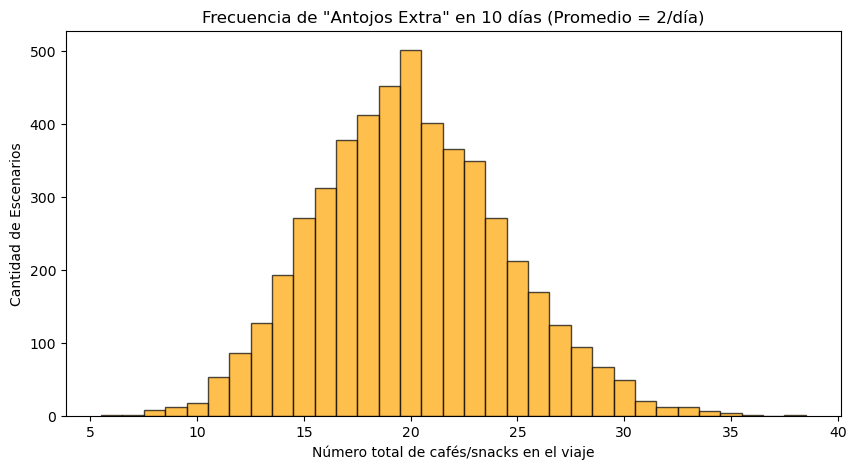

En promedio comprarás 20 cafés extra.
El gasto promedio en antojos será de: $1,601.71 MXN
¡Cuidado! Hubo un escenario donde compraste hasta 38 cafés.


In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Parámetros
promedio_eventos = 2  # Lambda: 2 cafés/snacks extra por día
dias_viaje = 10
iteraciones = 5000
costo_por_evento = 80 # Pesos por café/snack

def simulacion_poisson(n, lam, dias, costo):
    total_eventos_viaje = []
    gasto_total_antojos = []
    
    for _ in range(n):
        # Generamos los eventos para los 10 días y los sumamos
        # np.random.poisson genera el número de eventos
        eventos_del_viaje = sum(np.random.poisson(lam, dias))
        
        total_eventos_viaje.append(eventos_del_viaje)
        gasto_total_antojos.append(eventos_del_viaje * costo)
        
    return total_eventos_viaje, gasto_total_antojos

# Ejecución
eventos, gastos = simulacion_poisson(iteraciones, promedio_eventos, dias_viaje, costo_por_evento)

# Visualización
plt.figure(figsize=(10, 5))
# Usamos bins alineados a los números enteros por ser discreta
plt.hist(eventos, bins=range(min(eventos), max(eventos) + 2), 
         color='orange', edgecolor='black', alpha=0.7, align='left')
plt.title(f'Frecuencia de "Antojos Extra" en 10 días (Promedio = {promedio_eventos}/día)')
plt.xlabel('Número total de cafés/snacks en el viaje')
plt.ylabel('Cantidad de Escenarios')
plt.show()

print(f"En promedio comprarás {np.mean(eventos):.0f} cafés extra.")
print(f"El gasto promedio en antojos será de: ${np.mean(gastos):,.2f} MXN")
print(f"¡Cuidado! Hubo un escenario donde compraste hasta {max(eventos)} cafés.")